In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical  # Corrected import
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
import pickle


C:\Users\BHANU PRAKASH\.conda\envs\tf-gpu\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
os.chdir("D:\\1. CATS AND DOGS\\")

In [3]:
path = 'Dataset'

labels = []  
X_train = []  
Y_train = []  

def getID(name):
    index = 0
    for i in range(len(labels)):
        if labels[i] == name:
            index = i
            break
    return index
for root, dirs, directory in os.walk(path):
    for j in range(len(directory)):
        name = os.path.basename(root) 
        if name not in labels:
            labels.append(name)  
print(labels)

['single_prediction', 'model', 'test_set', 'cats', 'dogs']


In [4]:
import os
import cv2
import numpy as np

path = 'Dataset'

labels = []  
X_train = []  
Y_train = []  

def getID(name):
    for i in range(len(labels)):
        if labels[i] == name:
            return i
    labels.append(name) 
    return len(labels) - 1

for root, dirs, files in os.walk(path):
    for file in files:
        
        if 'Thumbs.db' not in file:
            name = os.path.basename(root)  
            print(name + " " + os.path.join(root, file))  
    
            img = cv2.imread(os.path.join(root, file))
            if img is not None:  
                img = cv2.resize(img, (64, 64))  
                
                im2arr = np.array(img)
                im2arr = im2arr.reshape(64, 64, 3)
                
                X_train.append(im2arr)
                Y_train.append(getID(name))

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

print("Labels:", labels)
print("Y_train:", Y_train)


single_prediction Dataset\single_prediction\cat_or_dog_1.jpg
single_prediction Dataset\single_prediction\cat_or_dog_2.jpg
model Dataset\single_prediction\model\cats_and_dogs_model.h5
test_set Dataset\test_set\.DS_Store
cats Dataset\test_set\cats\.DS_Store
cats Dataset\test_set\cats\cat.4001.jpg
cats Dataset\test_set\cats\cat.4002.jpg
cats Dataset\test_set\cats\cat.4003.jpg
cats Dataset\test_set\cats\cat.4004.jpg
cats Dataset\test_set\cats\cat.4005.jpg
cats Dataset\test_set\cats\cat.4006.jpg
cats Dataset\test_set\cats\cat.4007.jpg
cats Dataset\test_set\cats\cat.4008.jpg
cats Dataset\test_set\cats\cat.4009.jpg
cats Dataset\test_set\cats\cat.4010.jpg
cats Dataset\test_set\cats\cat.4011.jpg
cats Dataset\test_set\cats\cat.4012.jpg
cats Dataset\test_set\cats\cat.4013.jpg
cats Dataset\test_set\cats\cat.4014.jpg
cats Dataset\test_set\cats\cat.4015.jpg
cats Dataset\test_set\cats\cat.4016.jpg
cats Dataset\test_set\cats\cat.4017.jpg
cats Dataset\test_set\cats\cat.4018.jpg
cats Dataset\test_set\ca

In [5]:
import cv2
import numpy as np

X_train = X_train.astype('float64')  
X_train = X_train / 255  

test = X_train[3] 

cv2.imshow('aa', test) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 


In [6]:
X_train = np.array(X_train, dtype=np.float64) / 255.0 
Y_train = np.array(Y_train)
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train, Y_train = X_train[indices], Y_train[indices]

Y_train = to_categorical(Y_train, num_classes=4)
os.makedirs('model', exist_ok=True)

np.save('model/X.npy', X_train)
np.save('model/Y.npy', Y_train)

print(X_train.shape) 
print(Y_train.shape)  

(1258, 64, 64, 3)
(1258, 4)


In [7]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(4, activation='softmax'))

print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1605888   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1

In [8]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = classifier.fit(X_train, Y_train, batch_size=16, epochs=100, shuffle=True, verbose=2)

hist


Epoch 1/100
79/79 - 4s - loss: 0.6200 - accuracy: 0.7838
Epoch 2/100
79/79 - 3s - loss: 0.5268 - accuracy: 0.7949
Epoch 3/100
79/79 - 3s - loss: 0.5272 - accuracy: 0.7949
Epoch 4/100
79/79 - 3s - loss: 0.5237 - accuracy: 0.7949
Epoch 5/100
79/79 - 3s - loss: 0.5245 - accuracy: 0.7949
Epoch 6/100
79/79 - 3s - loss: 0.5242 - accuracy: 0.7949
Epoch 7/100
79/79 - 3s - loss: 0.5273 - accuracy: 0.7949
Epoch 8/100
79/79 - 3s - loss: 0.5241 - accuracy: 0.7949
Epoch 9/100
79/79 - 3s - loss: 0.5207 - accuracy: 0.7949
Epoch 10/100
79/79 - 3s - loss: 0.5337 - accuracy: 0.7949
Epoch 11/100
79/79 - 3s - loss: 0.5292 - accuracy: 0.7949
Epoch 12/100
79/79 - 3s - loss: 0.5315 - accuracy: 0.7949
Epoch 13/100
79/79 - 3s - loss: 0.5274 - accuracy: 0.7949
Epoch 14/100
79/79 - 3s - loss: 0.5243 - accuracy: 0.7949
Epoch 15/100
79/79 - 3s - loss: 0.5257 - accuracy: 0.7949
Epoch 16/100
79/79 - 3s - loss: 0.5215 - accuracy: 0.7949
Epoch 17/100
79/79 - 3s - loss: 0.5220 - accuracy: 0.7949
Epoch 18/100
79/79 - 3s

In [57]:
import pickle
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np

os.makedirs('model', exist_ok=True)

classifier = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

classifier.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

X_train = np.random.random((100, 64, 64, 3))  
y_train = np.random.randint(2, size=(100, 1))  

history = classifier.fit(X_train, y_train, epochs=9, batch_size=32)

classifier.save_weights('model/model_weights.h5')
model_json = classifier.to_json()
with open('model/model.json', 'w') as json_file:
    json_file.write(model_json)

with open('model/history.pckl', 'wb') as f:
    pickle.dump(history.history, f)

with open('model/history.pckl', 'rb') as f:
    data = pickle.load(f)

acc = data['accuracy']

if len(acc) > 8:
    accuracy_9th_epoch = acc[8] * 100  
    print(f"Accuracy at 9th epoch: {accuracy_9th_epoch}%")
else:
    print(f"Only {len(acc)} epochs available. Accuracy at first epoch: {acc[0] * 100}%")


Epoch 1/9
4/4 [==============================] - 0s 13ms/step - loss: 2.0931 - accuracy: 0.5300
Epoch 2/9
4/4 [==============================] - 0s 13ms/step - loss: 1.3655 - accuracy: 0.4700
Epoch 3/9
4/4 [==============================] - 0s 12ms/step - loss: 0.7555 - accuracy: 0.5200
Epoch 4/9
4/4 [==============================] - 0s 14ms/step - loss: 0.7110 - accuracy: 0.5300
Epoch 5/9
4/4 [==============================] - 0s 13ms/step - loss: 0.7007 - accuracy: 0.5000
Epoch 6/9
4/4 [==============================] - 0s 14ms/step - loss: 0.4570 - accuracy: 0.7500
Epoch 7/9
4/4 [==============================] - 0s 13ms/step - loss: 0.4260 - accuracy: 0.8400
Epoch 8/9
4/4 [==============================] - 0s 11ms/step - loss: 0.3583 - accuracy: 1.0000
Epoch 9/9
4/4 [==============================] - 0s 10ms/step - loss: 0.6022 - accuracy: 0.6700
Accuracy at 9th epoch: 67.00000166893005%


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os

classifier = Sequential([
    Flatten(input_shape=(64, 64, 3)), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.save('model/cats_and_dogs_model.h5')

In [59]:
import os

In [60]:
os.chdir("D:\\1. CATS AND DOGS\\")

In [61]:
import cv2

name = 'cat_or_dog_1.jpg' 
img = cv2.imread(name)


In [62]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import os

model_path = "D:/1. CATS AND DOGS/dataset/single_prediction/model/cats_and_dogs_model.h5"
image_path = "D:/1. CATS AND DOGS/dataset/single_prediction/cat_or_dog_1.jpg"

img = cv2.imread(image_path)
img_resized = cv2.resize(img, (64, 64))
XX = np.array(img_resized).reshape(1, 64, 64, 3).astype('float32') / 255

try:
    preds = model.predict(XX)
    predict = int(preds[0][0] > 0.5)  
    print(f"Predictions: {preds}")
    print(f"Predicted Class: {'Dog' if predict == 1 else 'Cat'}")
except Exception as e:
    print(f"Error during prediction: {e}")
    exit()

img_resized_for_display = cv2.resize(img, (500, 500))
msg = "Dog Detected" if predict == 1 else "Cat Detected"
cv2.putText(img_resized_for_display, msg, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

cv2.imshow(msg, img_resized_for_display)
cv2.waitKey(0)
cv2.destroyAllWindows()

Predictions: [[0.56120986]]
Predicted Class: Dog


In [63]:
os.chdir("D:\\1. CATS AND DOGS\\")

C:\Users\BHANU PRAKASH\AppData\Local\Temp\ipykernel_19440\3546990215.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(loss, 'ro-', color='red', label='Loss')
C:\Users\BHANU PRAKASH\AppData\Local\Temp\ipykernel_19440\3546990215.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(accuracy, 'go-', color='green', label='Accuracy')


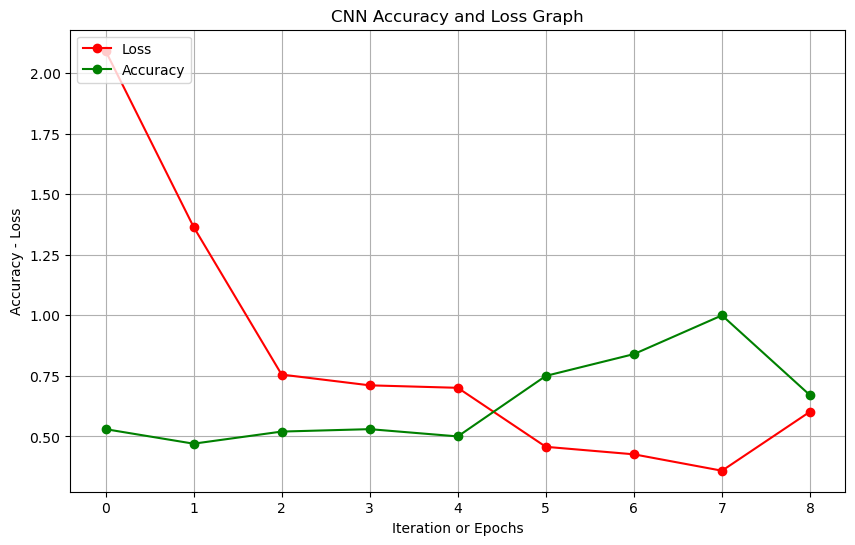

In [64]:
import pickle
import matplotlib.pyplot as plt

with open('model/history.pckl', 'rb') as f:
    data = pickle.load(f)

accuracy = data['accuracy']
loss = data['loss']

plt.figure(figsize=(10, 6))
plt.grid(True)

plt.xlabel("Iteration or Epochs")
plt.ylabel("Accuracy - Loss")

plt.plot(loss, 'ro-', color='red', label='Loss')
plt.plot(accuracy, 'go-', color='green', label='Accuracy')

plt.legend(loc='upper left')
plt.title("CNN Accuracy and Loss Graph")

plt.show()
